In [13]:
###Hello World Graph###
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [25]:
class AgentState(TypedDict):
    message: str

def greeting_node(state:AgentState):
    """simplle node that adds greeting message to the state"""

    state['message'] = "Hey  " + state['message'] + "how is your day going"

    return state

In [26]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

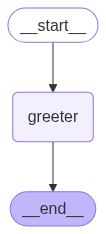

In [27]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
result = app.invoke({'message':'bob'})
result['message']

'Hey  bobhow is your day going'

In [29]:
class NewAgentState(TypedDict):
    message: str

def node_appreciate(state:NewAgentState):
    state['message'] = "Hello, you're doing a great job learning the langgraph" + state['message']
    return state

graph = StateGraph(NewAgentState)
graph.add_node('appreciater', node_appreciate)
graph.set_entry_point('appreciater')
graph.set_finish_point('appreciater')
new_app = graph.compile()


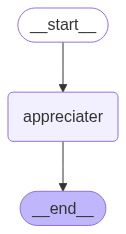

In [30]:
display(Image(new_app.get_graph().draw_mermaid_png()))

In [31]:
#####Second graph with multiple inputs###
from typing import List

class AgentState(TypedDict):
    values:List[int]
    name:str
    result:str


In [32]:
def process_values(state:AgentState):
    """This function handles multiple different inputs"""
    state['result'] = f"Hi There {state['name']}! Your Sum = {sum(state['values'])}"

    return state

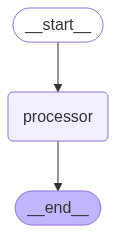

In [33]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
answers = app.invoke({"values":[1,2,3,4], "name":"Jake"})
answers['result']

'Hi There Jake! Your Sum = 10'